<a href="https://colab.research.google.com/github/Tirtayuda12/Machine_Learning-Telu/blob/main/UAS/Image_Classification_using_cifar10_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tirtayuda Munggarana

NIM : 1103202108

UAS Image Classification on cifar10 datasets

Model CNN

Referensi :


*   https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
*   https://www.youtube.com/watch?v=QIhdUKKA8nU



In [23]:
# Import Library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.utils import to_categorical  # Use to_categorical instead of np_utils
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# load dataset cifar10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [4]:
# menampilkan banyaknya gambar, ukuran gambar dan banyaknya layer
train_images.shape

(50000, 32, 32, 3)

In [5]:
train_labels.shape

(50000, 1)

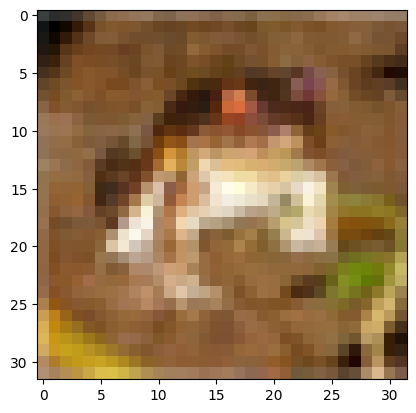

In [6]:
# melihat gambar yang pertama
plt.imshow(train_images[0])

In [7]:
# menampilkan label di image pertama
train_labels[0][0]

6

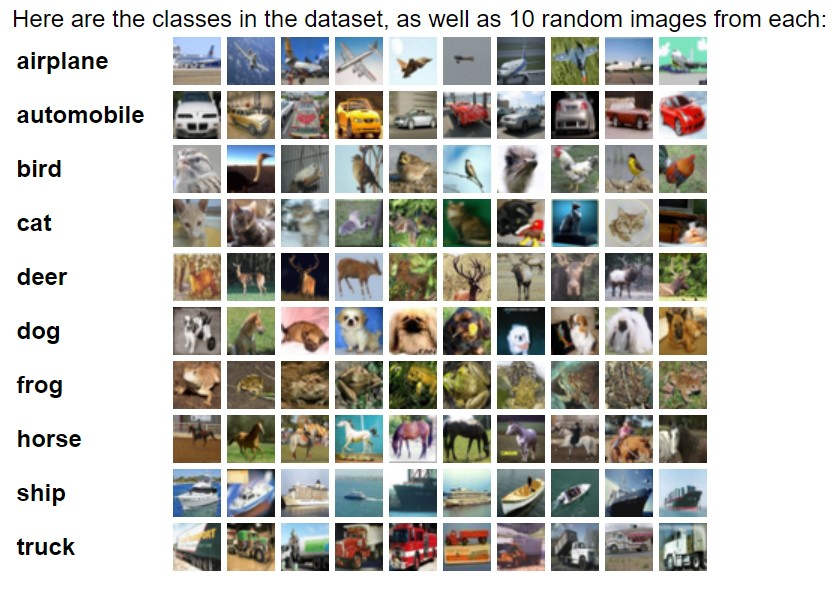

In [8]:
# label tersebut didalam array 2 dimensi
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
# label haruslah diubah dahulu menjadi array 1 dimensi
train_labels = train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
test_labels = test_labels.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

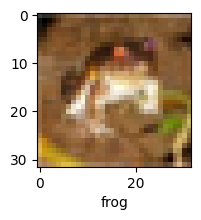

In [13]:
plot_sample(train_images, train_labels, 0)

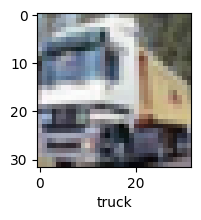

In [14]:
plot_sample(train_images, train_labels, 1)

In [15]:
# normalisasi data latih dan data testing
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
# One Hot Encoding
train_labelsH = to_categorical(train_labels)
test_labelsH = to_categorical(test_labels)

In [17]:
#menampilkan banyaknya kolom untuk semua data
train_labelsH.shape

(50000, 10)

In [18]:
# melihat label dengan indeks 1 yang sudah diubah menjadi matriks one hot encoding
train_labelsH[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
train_labelsH[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Model arsitektur CNN

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # Use layers.Conv2D
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # Use layers.Conv2D
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # Use layers.Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Use tf.keras.optimizers
cnn.compile(optimizer=opt,loss= 'categorical_crossentropy',metrics=['accuracy'])
cnn.fit(train_images,train_labelsH,epochs=70,batch_size=200,validation_data=(test_images, test_labelsH))

Epoch 1/70
250/250 [==============================] - 7s 10ms/step - loss: 1.7522 - accuracy: 0.3571 - val_loss: 1.4727 - val_accuracy: 0.4633
Epoch 2/70
250/250 [==============================] - 2s 7ms/step - loss: 1.4001 - accuracy: 0.4954 - val_loss: 1.3080 - val_accuracy: 0.5323
Epoch 3/70
250/250 [==============================] - 2s 6ms/step - loss: 1.2826 - accuracy: 0.5447 - val_loss: 1.2336 - val_accuracy: 0.5581
Epoch 4/70
250/250 [==============================] - 2s 7ms/step - loss: 1.1961 - accuracy: 0.5782 - val_loss: 1.1717 - val_accuracy: 0.5853
Epoch 5/70
250/250 [==============================] - 2s 7ms/step - loss: 1.1242 - accuracy: 0.6027 - val_loss: 1.1202 - val_accuracy: 0.6009
Epoch 6/70
250/250 [==============================] - 2s 8ms/step - loss: 1.0596 - accuracy: 0.6264 - val_loss: 1.0545 - val_accuracy: 0.6266
Epoch 7/70
250/250 [==============================] - 2s 8ms/step - loss: 1.0158 - accuracy: 0.6436 - val_loss: 1.0457 - val_accuracy: 0.6340
Epoch

In [21]:
## Prediksi
y_predict=cnn(test_images)

In [27]:
np.round(y_predict[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

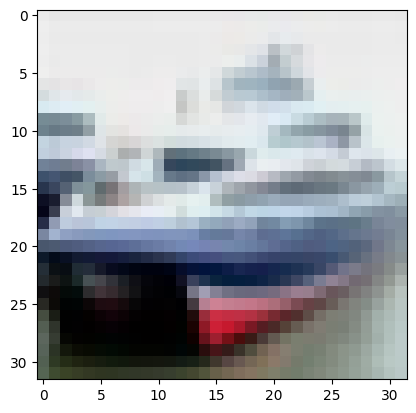

In [28]:
plt.imshow(test_images[1])

In [33]:
np.round(y_predict[9])

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

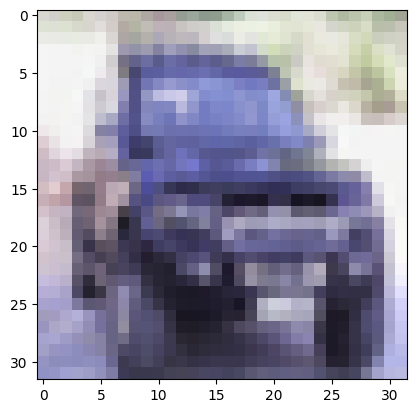

In [32]:
plt.imshow(test_images[9])